# Import required libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from visualization import visualization #importing class from visualization.py

# Load the data into a dataframe

In [2]:
df = pd.read_csv('showwcase_sessions.csv')
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


# Check the datatypes and if null values exist

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

# There are 302 records and all the columns have 2 null records except "Session likes given" which has 3 null records

In [4]:
df[pd.isnull(df).any(axis=1)] #check the rows that contain null values

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The last 2 rows have null values and the record at index 35 has a null value in "session_likes_given" column which can be ignored as the session itself has no likes recorded

In [5]:
df.dropna(subset=['customer_id'], inplace=True) # drop the null records

# Find how many unique customers are there

In [6]:
unique_users = len(df['customer_id'].unique())
print(f"The number of unique customers is {unique_users}")

The number of unique customers is 48


# Convert "login_date" column to datetime format from string format for manipulation purpose 

In [7]:
df['login_date'] = pd.to_datetime(df.login_date)

# Sort the records according to date

In [8]:
df = df.sort_values('login_date').reset_index(drop=True)

In [9]:
df.tail()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
295,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
296,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
297,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
298,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
299,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0


# Check conversion rate of the sessions

In [10]:
count = 0
for i,j in df.iterrows():
    #check if the sessions have atleast 1 projects_added or 1 likes_given or 1 comment_given
    if j['projects_added'] == True or j['likes_given'] == True or j['comment_given'] == True: 
        count +=1
print(f"The number of converted sessions is {count}")
print(f"The conversion rate is {(count/300)*100}%")

The number of converted sessions is 296
The conversion rate is 98.66666666666667%


In [15]:
"""def main():
    v = visualization(df)
    v.active_sessions()

if __name__ == "__main__":
    main()  """

'def main():\n    v = visualization(df)\n    v.active_sessions()\n\nif __name__ == "__main__":\n    main()  '

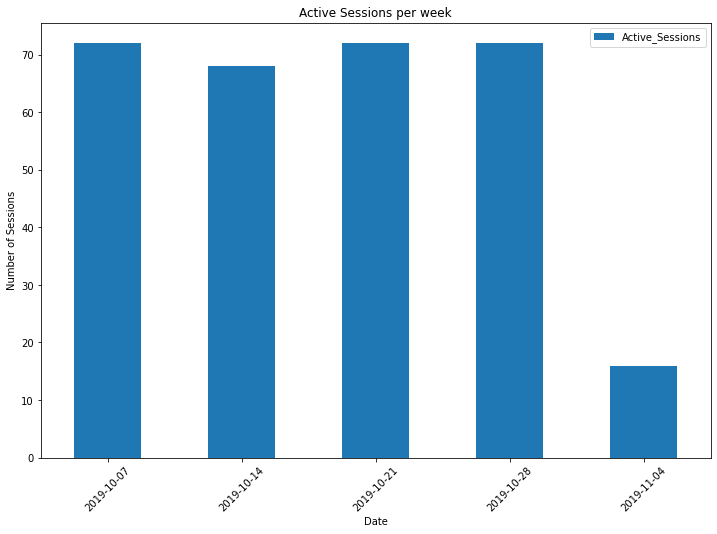

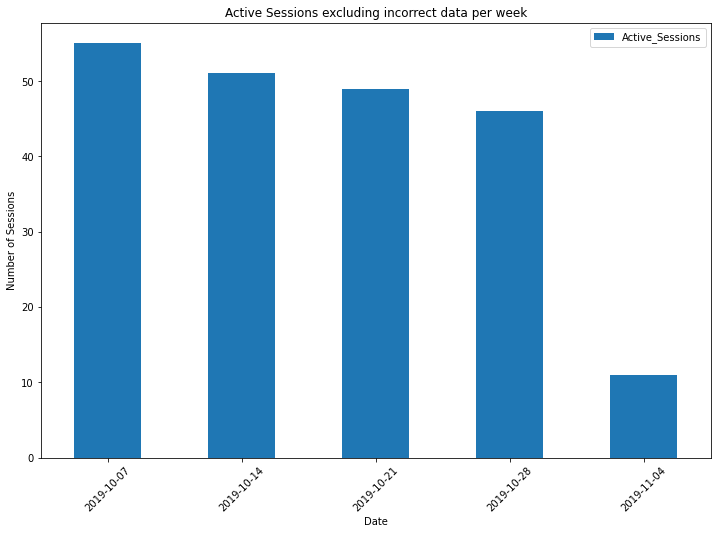

In [22]:
v = visualization(df)
v.active_sessions()

User Engagement can be defined as how much time the users spend on the showwcase platform and how the users interact with the platform. Interactions could be "Likes", "Comments" and "Projects added".

The first chart shows that there has been consistent number of sessions every week in the month of october 2019. It means that users continuosly login into the platform.

The second chart shows the same without 88 records where "inactive_duration" is greater than the "session_duration" which can't be the case. This shows a gradual decline in the number of sessions every week. To confirm the real trend, we need to fix this data issue.

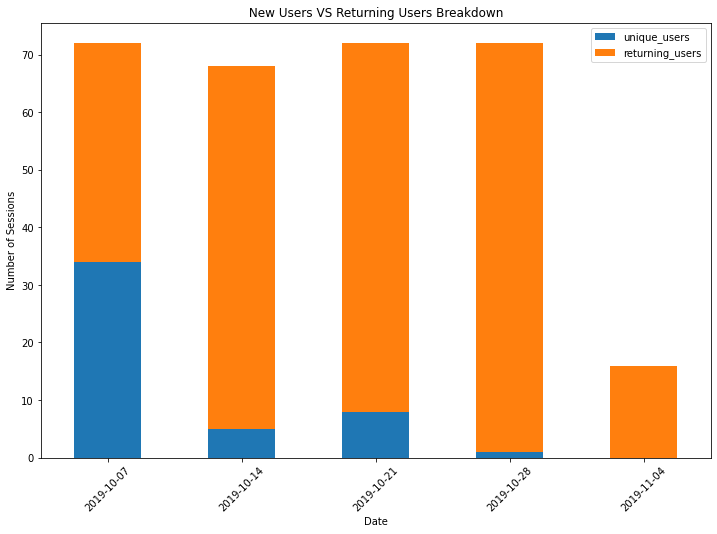

In [23]:
v.unique_vs_returning_users()

 The users are assumed to be the new and returning corresponding to October month only.

 The above chart shows the breakdown of new users and unique users in the total sessions of the week. It can be seen that the number of new/unique users decreased rapidly in the 2nd and the following week and almost half of the sessions are by new users in the 1st week. But the overall sessions stay consistent throughout the month meaning user retention is good but new user signing up for the platform is low.

 We need to investigate the sign-up flow data to find the reason for the decline in new user sign-up. In the other case, the spike in the week could be due to an event like asking the candidates to sign-up to be considered for the hiring process. 

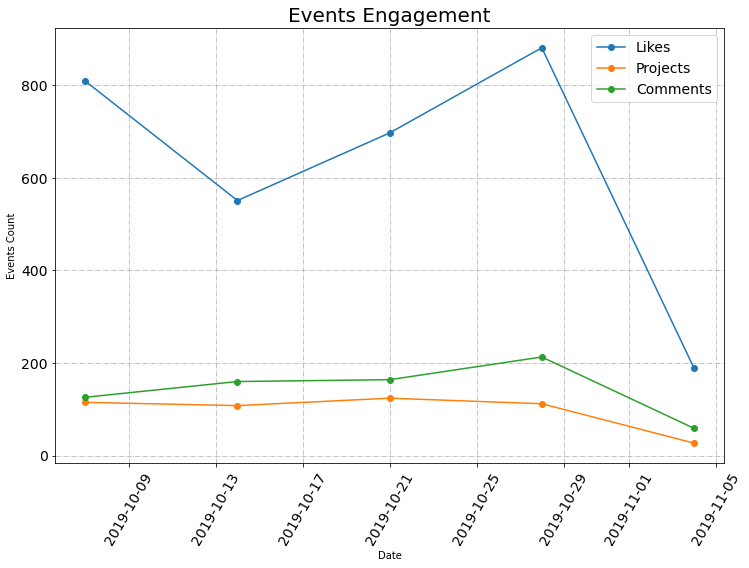

In [19]:
v.events_engagement()

 Next we will see how the users are interacting with the platform. 
 
 The above chart shows the number of individual events happening every week. The projects and comments are almost consistent with at least 100 projects have been added by the users every week. 
 
 The event "likes" has been inconsistent with sudden peaks and valleys with 1st and 4th week seeing highest number of likes. It might be because as the users interact with a project(comment) , it gets the visibility to more users and generating more likes in the span of 2 weeks.

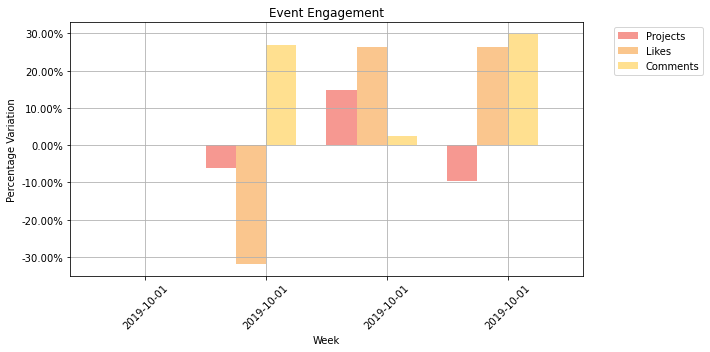

In [24]:
v.events_engagement_percentage_variation()

Let's see if the percentage variation chart tells the same story as that of the previous chart.

Surprisingly, we could see projects have have seen a reduction and increase by less than 10% and more than 10% respectively as opposed to the previous chart which gave an impression like they are almost consistent. 

Similarly, comments have increased by 20% and 30% in the 2nd and 4th week which was not visible to the naked eye in the previous chart.

Likes reflect exactly the same from the previous chart.

With this chart we captured more granular details of the users' engagement with the platform.

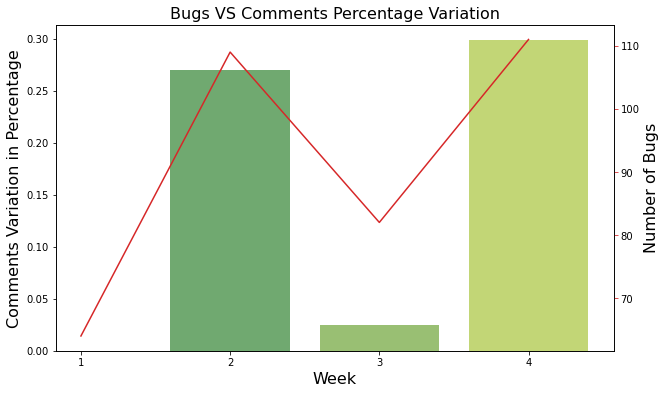

In [21]:
v.source_of_bugs()

 This is an attempt to see if bugs are caused by a particular event or user interaction in the platform. 
 
 The aggregated bugs(dataframe)for each week showed a sudden peak in 2nd week and 4th week. The percentage variation graph showed an increase in comments. So, plotted both bugs and percentage variation in comments together to see if there is a correlation. 
 
 It can been seen that as there is an increase in comments, there is an increase in the number of bugs. It can be communicated to the development team to confirm it. 

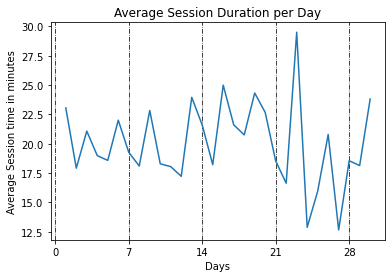

In [17]:
v.average_session_duration()

The above plot shows the average duration of the session each day for the whole month.

There exists a trend in 2nd and 3rd week with high session duration in the first couple days of the week and the later days of the week. The behavior in the 4th week could be an outlier which we can conclude using the next few months of the data. Are these inconsitencies due to the sessions being dominated by the event "Likes" than the other 2 events which are crucial for the users interaction and engagement with the platform?.